In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The week 1 analyzes is open

In [2]:
dfWeek1 = pd.read_csv('../data/week1analyzesStates.csv')
dfWeek1

,cve_ent,state,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,1,AGUASCALIENTES,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
1,2,BAJA CALIFORNIA,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
2,3,BAJA CALIFORNIA SUR,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
3,4,CAMPECHE,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
4,7,CHIAPAS,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
5,8,CHIHUAHUA,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
6,5,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
7,6,COLIMA,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
8,9,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
9,10,DURANGO,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


Education dataframes for each state

Population who can and can not read and write

In [3]:
df = pd.read_excel('../data/Educacion_01.xlsx',skiprows = range(0, 3))

Rename of column titles for easier interpretation

In [4]:
df.rename(columns = {'Entidad federativa': 'state', 'Sabe leer y escribir': 'read_write', 'No sabe leer y escribir': 'not_read_write', 'No especificado': 'not_specified'}, inplace=True)

Elimination of the total row for the whole country

In [5]:
df.query("state != 'Estados Unidos Mexicanos'", inplace=True)

Calculation of percentages of population who can and can not read and write

In [6]:
df['pct_read_write']=(df['read_write']/df['Total'])*100

In [7]:
df['pct_not_read_write']=(df['not_read_write']/df['Total'])*100

The column with the data which will be the intersection with the week 1 analyzes is cleaned

In [8]:
df['state'] = df['state'].str.upper()
df = df.iloc[0:32,:].copy()
df.sort_values(by=['state'], ascending = True, inplace=True)
df.at[9,'state']='DISTRITO FEDERAL'
df.at[5,'state']='COAHUILA'
df.at[15,'state']='MEXICO'
df.at[16,'state']='MICHOACAN'
df.at[30,'state']='VERACRUZ'
df.at[22,'state']='QUERETARO'
df.at[24,'state']='SAN LUIS POTOSI'
df.at[31,'state']='YUCATAN'
df.at[19,'state']='NUEVO LEON'

df.sort_values(by=['state'], ascending = True, inplace=True)
df = df[['state','pct_read_write','pct_not_read_write']].copy()

In [9]:
dfAll = pd.merge(df,dfWeek1,on='state')

The correlation between the percentage of people who can not write and read with the cases rate

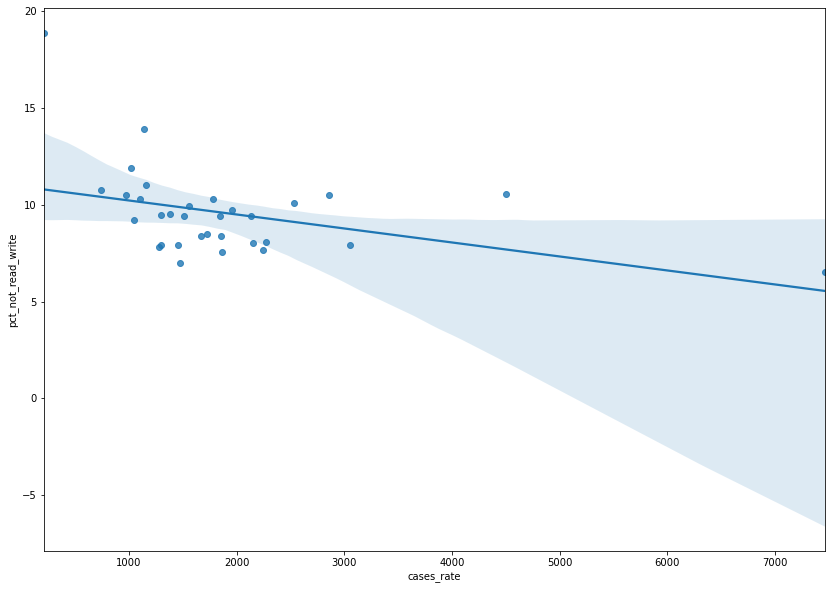

In [10]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="pct_not_read_write", data=dfAll)
sns.set_context('paper', font_scale=2)

The correlation between the percentage of people who can write and read with the cases rate

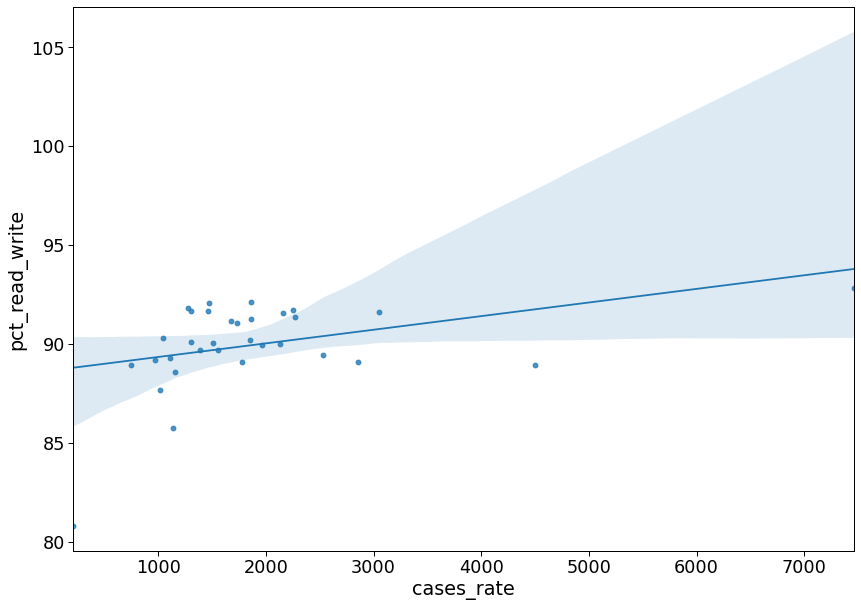

In [11]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="pct_read_write", data=dfAll)
sns.set_context('paper', font_scale=2)

Averange years of education finish in each state

In [12]:
df2 = pd.read_excel('../data/Educacion_05.xlsx',skiprows = range(0, 4))
df2.rename(columns = {'Entidad federativa': 'state', 'Total': 'average_years_finish'}, inplace=True)
df2.query("state != 'Estados Unidos Mexicanos'", inplace=True)
df2 = df2.iloc[0:32,:].copy()
df2['state'] = df2['state'].str.upper()
df.sort_values(by=['state'], ascending = True, inplace=True)
df2.at[9,'state']='DISTRITO FEDERAL'
df2.at[5,'state']='COAHUILA'
df2.at[15,'state']='MEXICO'
df2.at[16,'state']='MICHOACAN'
df2.at[30,'state']='VERACRUZ'
df2.at[22,'state']='QUERETARO'
df2.at[24,'state']='SAN LUIS POTOSI'
df2.at[31,'state']='YUCATAN'
df2.at[19,'state']='NUEVO LEON'
df2.sort_values(by=['state'], ascending = True, inplace=True)
df2 = df2.loc[:,'state':'average_years_finish'].copy()

In [13]:
dfAll = pd.merge(df2,dfAll,on='state')

The correlation between the averange years of education finish with the cases rate

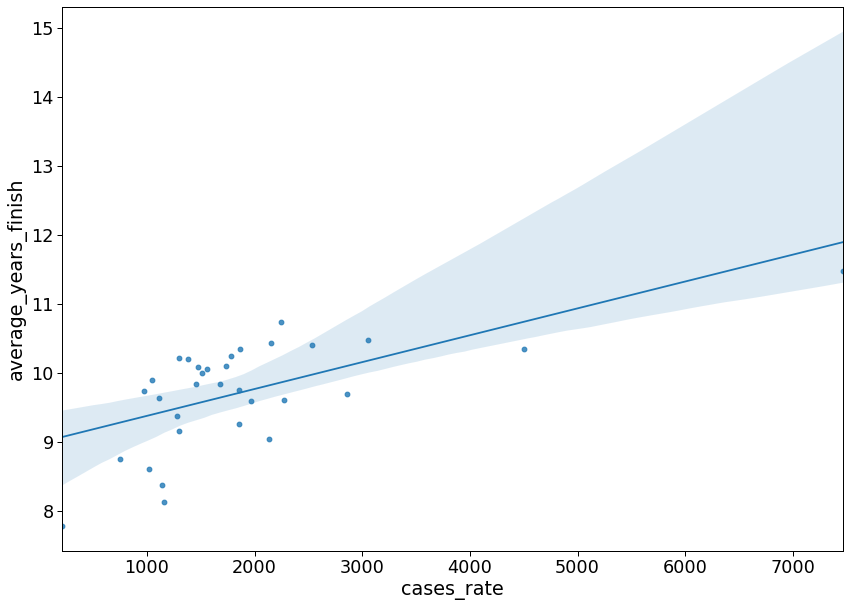

In [14]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="average_years_finish", data=dfAll)
sns.set_context('paper', font_scale=2)

Averange household size in each state

In [15]:
df3 = pd.read_excel('../data/Vivienda_02.xlsx',skiprows = range(0, 3))
df3.rename(columns = {'Entidad federativa': 'state', '2020': 'average_household_size'}, inplace=True)
df3.query("state != 'Estados Unidos Mexicanos'", inplace=True)
df3 = df3.iloc[0:32,:].copy()
df3['state'] = df3['state'].str.upper()
df3.sort_values(by=['state'], ascending = True, inplace=True)
df3.at[9,'state']='DISTRITO FEDERAL'
df3.at[5,'state']='COAHUILA'
df3.at[15,'state']='MEXICO'
df3.at[16,'state']='MICHOACAN'
df3.at[30,'state']='VERACRUZ'
df3.at[22,'state']='QUERETARO'
df3.at[24,'state']='SAN LUIS POTOSI'
df3.at[31,'state']='YUCATAN'
df3.at[19,'state']='NUEVO LEON'
df3.sort_values(by=['state'], ascending = True, inplace=True)
df3 = df3.loc[:,['state','average_household_size']].copy()

In [16]:
dfAll = pd.merge(df3,dfAll,on='state')

The correlation between the averange household size with the cases rate

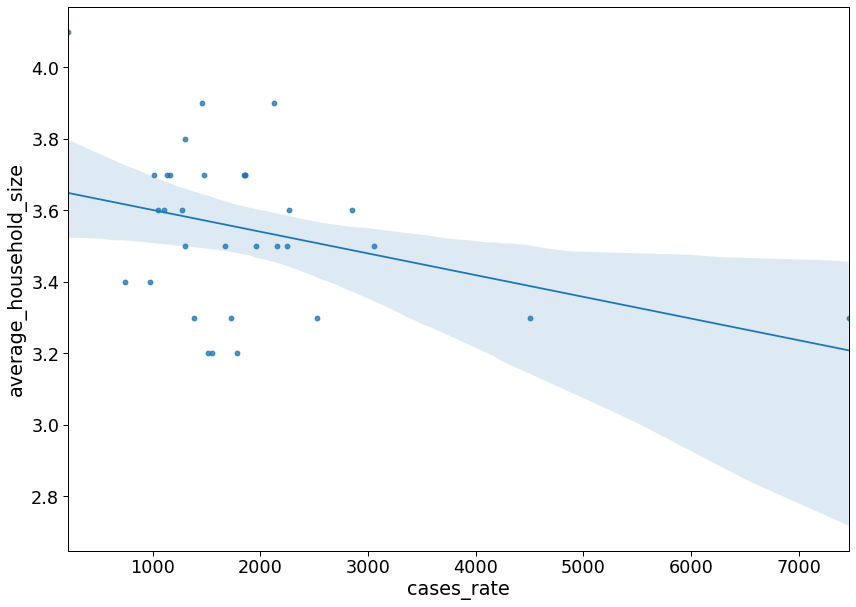

In [17]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="average_household_size", data=dfAll)
sns.set_context('paper', font_scale=2)

Correlation of the data by pairplot

<Figure size 1440x1440 with 0 Axes>

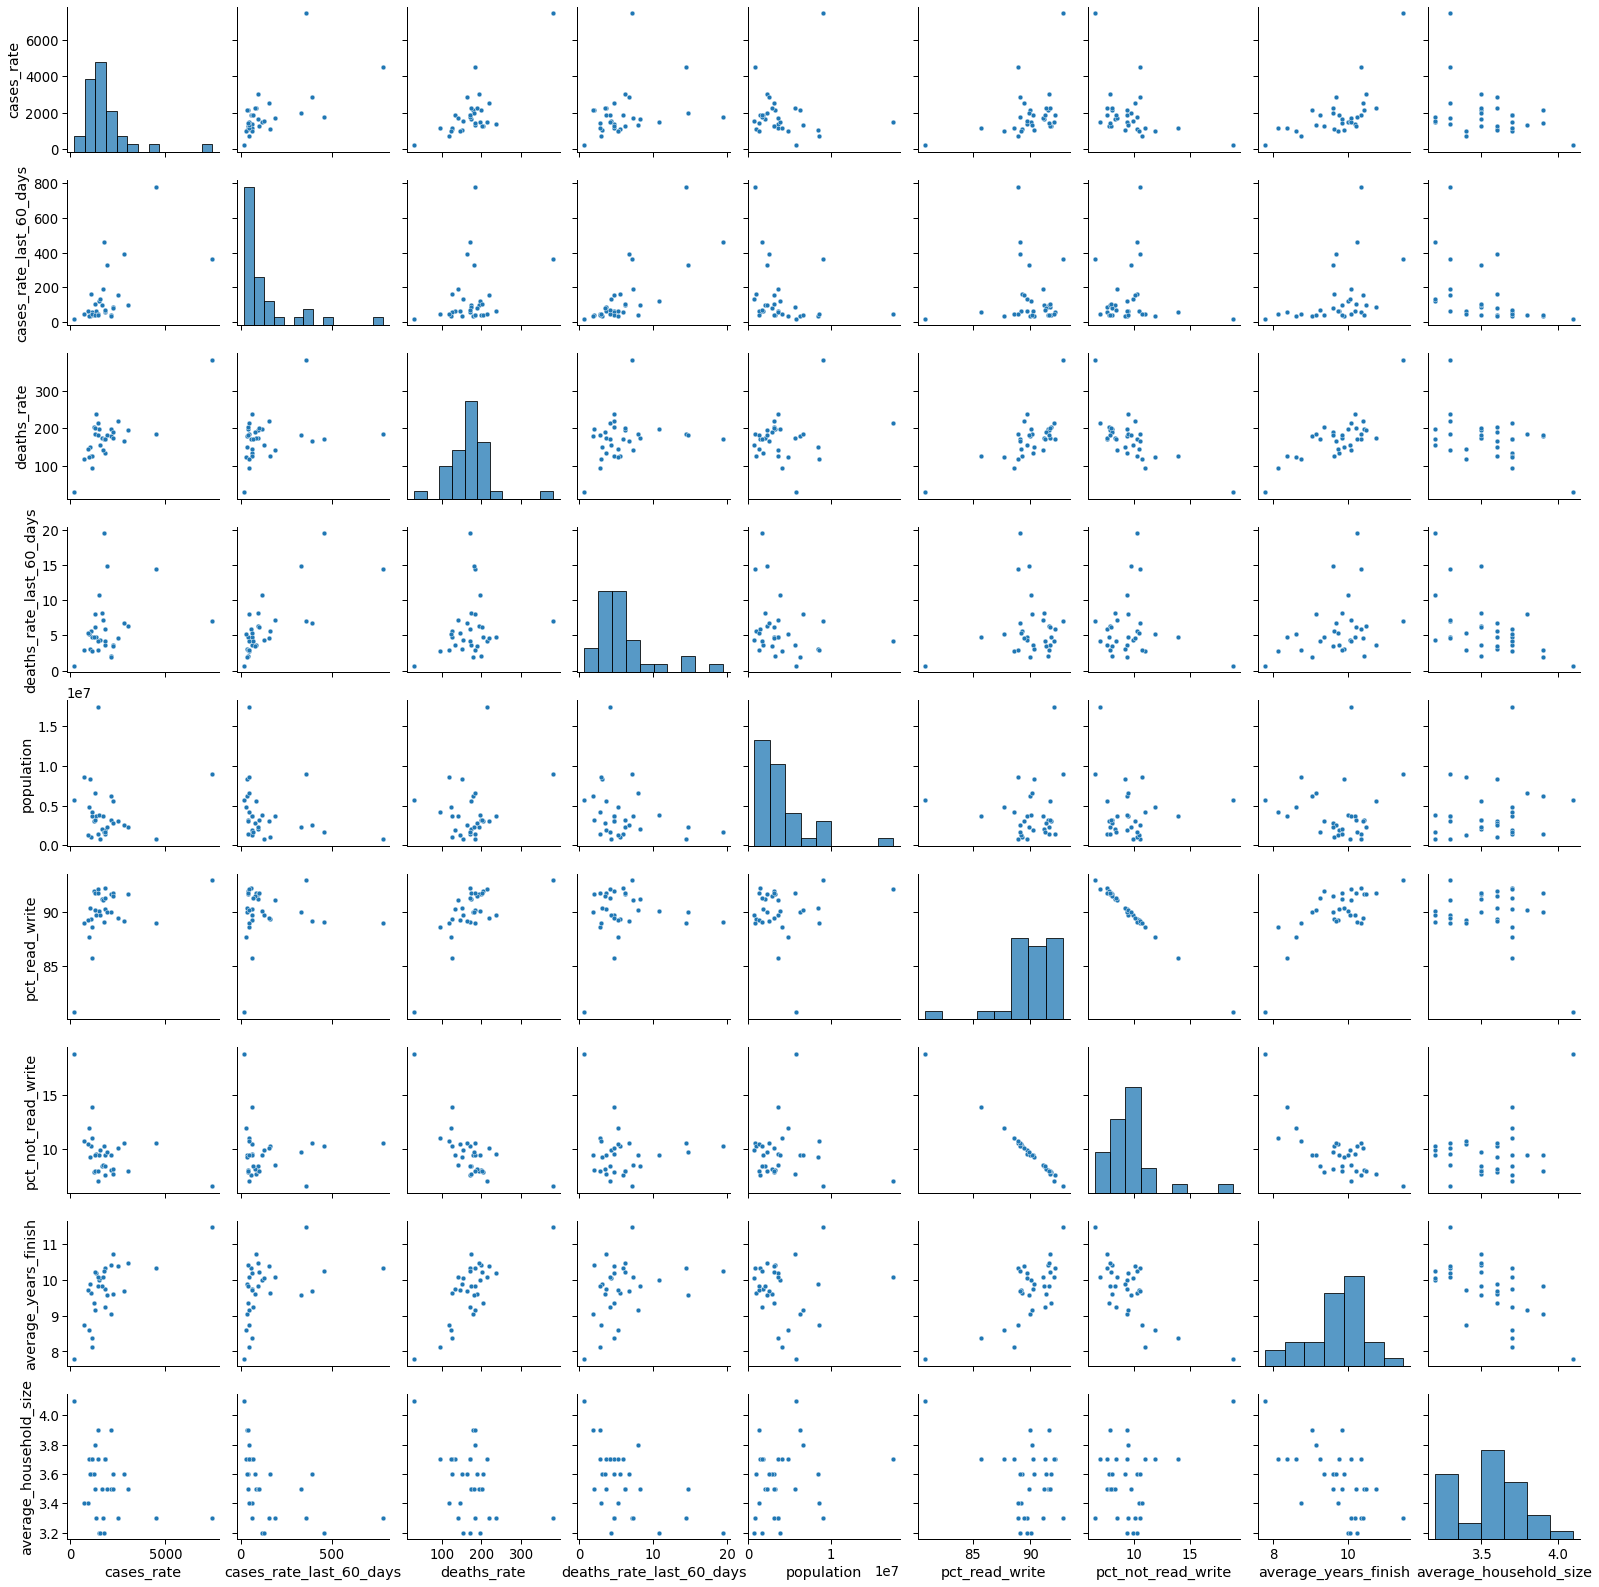

In [18]:
plt.figure(figsize=(20,20))
dfFinal = dfAll[['cases_rate','cases_rate_last_60_days', 'deaths_rate',
                 'deaths_rate_last_60_days','population','pct_read_write','pct_not_read_write',
                 'average_years_finish','average_household_size']].copy()
sns.set_context('paper', font_scale=1.5)
pairplot = sns.pairplot(dfFinal)
#pairplot = pairplot.get_figure()

#pairplot.savefig("../results/pairplot.png")

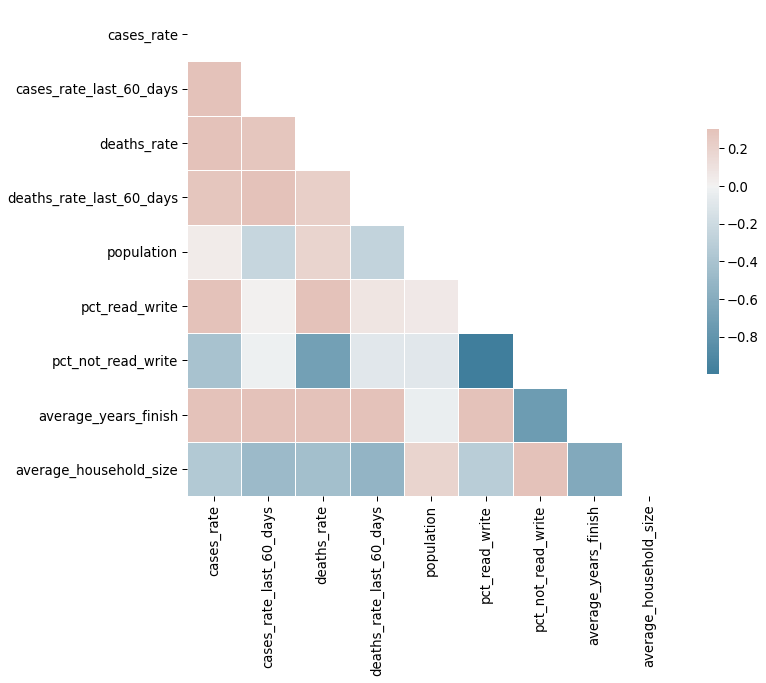

In [19]:
corr = dfFinal.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set_context('paper', font_scale=0.5)
heatmap = heatmap.get_figure()
#heatmap.savefig("../results/heatmap.png")